In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load the dataset
iris = load_iris()



In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [4]:
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# Preprocess Data
X = df.drop('species', axis=1)
y = df['species']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:

# Train Logistic Regression Model
model = LogisticRegression(multi_class='ovr', max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr')

In [8]:
# Make predictions
y_pred = model.predict(X_test)

In [9]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}\nConfusion Matrix:\n{conf_matrix}')

Accuracy: 0.9666666666666667
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


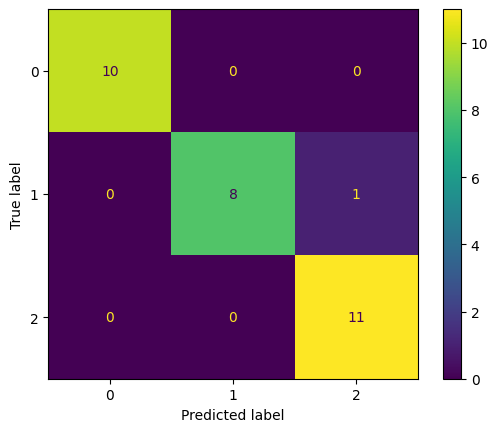

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.show()

In [11]:
# Save the Model
import pickle

with open('iris_model.pkl', 'wb') as file:
    pickle.dump({'model': model, 'scaler': scaler}, file)